In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

verbose=True

def pprint(content,visible=verbose):
    if visible:
        if isinstance(content, str) :
            print(' => '+content+'\n')
        else :
            if 'matplotlib' in str(type(content)):
                plt.figure()
            display(content)

def hist_text(series,left=0,right=1,bins=10):
    return series.groupby(pd.cut(series, [(x/bins)*(right-left)+left for x in range(bins+1)],include_lowest=True)).count()

In [2]:
def load_data(url="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"):
    '''
    Loads Data (similar to sklearn.datasets.load_boston)

    :param url: space separated file location containing Boston housing data
    :return: Raw pd.df containing Boston housing data
    '''
    ### Harrison (1978)과 평균값, Belsley (1980)와 첫 데이터를 비교하여 이상 없음을 확인했음
    # CRIM - 범죄율 (1인당)
    # ZN - large-lot zone 비율 (25000sqft 이하의 주택이 금지되는 구역)
    # INDUS - 산업지구 비율 (공해도)
    # CHAS - 더미 변수 (찰스강 경계에 위치 = 1, 아니면 = 0)
    # NOX - 일산화질소 농도 (단위 : 10pphm, parts per 10 million)
    # RM - 가구당 방의 개수 (부동산 품질)
    # AGE - 오래된 자가주택 비율 (1940년 기준, 구조물 품질에 관련됨)
    # DIS - 고용센터까지의 거리 (통근거리, 가중평균, 로그)
    # RAD - 고속도로 접근성 (공해도, 통근거리, 로그)
    # TAX - 재산세율
    # PTRATIO - 학생-교사 비율
    # B - 흑인 비율 (1000(Bk - 0.63)^2)
    # LSTAT - 하위계층 %비율
    # MEDV - 자가주택 가격 중앙값 (단위 $1000)
    ### 변수 분류
    # 종속변수 : MEDV
    # Structural : RM, AGE
    # Neighborhood : B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO, CHAS
    # Accessibility : DIS, RAD
    # Air Pollution : NOX, PART

    names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
    boston_housing_dataframe = pd.read_csv(url, names=names, header=None, delim_whitespace=True)
    return boston_housing_dataframe

data_category = {'structural' : ['RM', 'AGE'],
    'neighborhood' : ['B', 'LSTAT', 'CRIM', 'ZN', 'INDUS', 'TAX', 'PTRATIO', 'CHAS'],
    'accessibility' : ['DIS', 'RAD'],
    'pollution' : ['NOX', 'PART']}

df_boston_housing = load_data()
np.random.seed(1); df_boston_housing=df_boston_housing.reindex(np.random.permutation(df_boston_housing.index))
pprint(df_boston_housing.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
pprint(df_boston_housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80,16.6
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10,22.0
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,20.9
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307.0,17.4,376.75,10.88,24.0


In [4]:
def cut_data(df, ratio_list):
    '''
    Cuts df into smaller rows
    
    :return: [df1, df2, df3, ...] with size=len(ratio_list)+1
    '''
    if not np.sum(ratio_list)<1 :
        raise Error('invalid ratio_list')
    
    offset = (np.array(ratio_list).cumsum()*df.shape[0]).astype(int).tolist()
    offset = zip([0]+offset,offset+[df.shape[0]])
    return [df.iloc()[x[0]:x[1]] for x in offset]

df_feature = df_boston_housing.copy()
df_targets = pd.DataFrame(df_feature.pop('MEDV'))

df_feature_train, df_feature_test, df_feature_validate = cut_data(df_feature,[0.5,0.2])
df_targets_train, df_targets_test, df_targets_validate = cut_data(df_targets,[0.5,0.2])


<AxesSubplot:>

array([[<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

,AGE,CRIM,INDUS,LSTAT,NOX,PTRATIO,RAD,TAX,B,DIS,ZN,CHAS,RM
AGE,1.00,0.33,0.64,0.57,0.75,0.22,0.44,0.50,-0.26,-0.73,-0.55,0.06,-0.16
CRIM,0.33,1.00,0.39,0.41,0.43,0.27,0.62,0.57,-0.32,-0.37,-0.20,-0.04,-0.12
INDUS,0.64,0.39,1.00,0.60,0.76,0.35,0.56,0.68,-0.34,-0.70,-0.52,0.06,-0.34
LSTAT,0.57,0.41,0.60,1.00,0.60,0.37,0.51,0.56,-0.41,-0.48,-0.42,-0.11,-0.57
NOX,0.75,0.43,0.76,0.60,1.00,0.20,0.63,0.68,-0.38,-0.78,-0.53,0.04,-0.23
PTRATIO,0.22,0.27,0.35,0.37,0.20,1.00,0.44,0.41,-0.18,-0.20,-0.36,-0.16,-0.36
RAD,0.44,0.62,0.56,0.51,0.63,0.44,1.00,0.90,-0.46,-0.48,-0.30,-0.02,-0.19
TAX,0.50,0.57,0.68,0.56,0.68,0.41,0.90,1.00,-0.45,-0.51,-0.32,-0.04,-0.28
B,-0.26,-0.32,-0.34,-0.41,-0.38,-0.18,-0.46,-0.45,1.00,0.28,0.17,0.07,0.11
DIS,-0.73,-0.37,-0.70,-0.48,-0.78,-0.20,-0.48,-0.51,0.28,1.00,0.60,-0.09,0.10


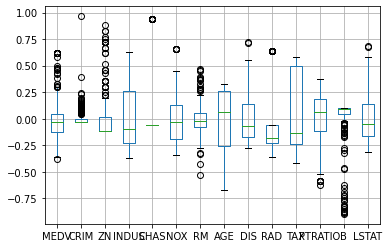

<Figure size 432x288 with 0 Axes>

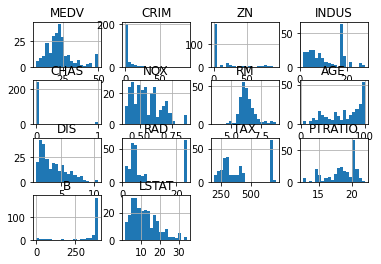

In [5]:
import scipy.cluster.hierarchy as spc

def plot_corr(df, cluster=False, absolute=False):
    '''
    Prints 
    
    :params df: pd.df
    :params cluster: sorts column if True. bool
    :returns: correlation matrix. pandas.io.formats.style.Styler object
    '''
    corr = df.corr()
    
    if absolute :
        corr = corr.abs()
    
    if cluster :
        pdist = spc.distance.pdist(corr)
        linkage = spc.linkage(pdist, method='complete')
        idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
        new_index = [x for _,x in sorted(zip(idx,list(df.columns)))]
        corr = corr.reindex(new_index)[new_index]
        
        output = corr \
            .style.background_gradient(cmap='coolwarm') \
            .set_precision(2) \
            .set_table_attributes('style="font-size: 10px"')
            #.set_properties(**{'font-size': '0pt'})
    return output

df_all_train = pd.concat([df_targets_train, df_feature_train],axis=1)
pprint(((df_all_train-df_all_train.mean()) / (df_all_train.max()-df_all_train.min())).boxplot())
pprint(df_all_train.hist(bins=20))
pprint(plot_corr(df_feature_train, cluster=True))#.render()


In [6]:
#df_targets_train.sort_values(ascending=False).head(n=20)
#df_feature_train['NOX'].sort_values(ascending=False).head(n=100).hist(bins=30)
#df_feature_train['PTRATIO'].sort_values(ascending=False).head(n=100).hist(bins=30)
pprint('''Contains Outlier : MEDV, NOX, RAD (가격, 일산화질소 농도)
최대값에 빈도가 몰려 있다. MEDV는 clipping된 것 같다. NOX의 경우 Belsley (1980)에 따르면 오류값일 가능성이 높다.
따라서 training 및 test set에서 제거하는 것이 예측력을 높일 수 있다.
RAD에도 유사한 패턴이 있지만, 이것을 제거하면 MEDV와의 correlation이 0.1 정도로 매우 작아지기 때문에 제거하지 않는다.''')
pprint('''Skewed : CRIM, PTRATIO, INDUS, ZN, B (범죄, 교육, 공해, 대저택, 흑인)
특정 지역에 실제로 집중되어 분포가 Skew 되어 있을 수 있다.''')
pprint('''Multimodal : TAX (재산세율)
숨겨진 변수 때문일 수 있다. Harrison (1978)에 따르면 town간 과세평가적용률이 무시되었다.
만약 그렇다면 linear fitting은 잘 작동하지 않을 가능성이 높고, 특성 교차를 이용하는 것이 효과적일 수 있다.''')
pprint('''Continuous : RM, LSTAT, AGE, DIS (방 개수, 하위계층 비율, 오래된 주택 비율, 통근거리)
주택 품질에 대한 데이터는 대체로 연속적이다. 그러나 RM을 제외하면 대체로 정규분포에서 벗어나 있다.''')

 => Contains Outlier : MEDV, NOX, RAD (가격, 일산화질소 농도)
최대값에 빈도가 몰려 있다. MEDV는 clipping된 것 같다. NOX의 경우 Belsley (1980)에 따르면 오류값일 가능성이 높다.
따라서 training 및 test set에서 제거하는 것이 예측력을 높일 수 있다.
RAD에도 유사한 패턴이 있지만, 이것을 제거하면 MEDV와의 correlation이 0.1 정도로 매우 작아지기 때문에 제거하지 않는다.

 => Skewed : CRIM, PTRATIO, INDUS, ZN, B (범죄, 교육, 공해, 대저택, 흑인)
특정 지역에 실제로 집중되어 분포가 Skew 되어 있을 수 있다.

 => Multimodal : TAX (재산세율)
숨겨진 변수 때문일 수 있다. Harrison (1978)에 따르면 town간 과세평가적용률이 무시되었다.
만약 그렇다면 linear fitting은 잘 작동하지 않을 가능성이 높고, 특성 교차를 이용하는 것이 효과적일 수 있다.

 => Continuous : RM, LSTAT, AGE, DIS (방 개수, 하위계층 비율, 오래된 주택 비율, 통근거리)
주택 품질에 대한 데이터는 대체로 연속적이다. 그러나 RM을 제외하면 대체로 정규분포에서 벗어나 있다.



<AxesSubplot:>

array([[<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

,AGE,CRIM,INDUS,LSTAT,NOX,PTRATIO,RAD,TAX,B,DIS,MEDV,RM,ZN,CHAS
AGE,1.00,0.34,0.62,0.61,0.76,0.31,0.47,0.50,-0.26,-0.71,-0.45,-0.19,-0.53,0.01
CRIM,0.34,1.00,0.40,0.44,0.49,0.27,0.62,0.57,-0.32,-0.39,-0.42,-0.11,-0.20,-0.06
INDUS,0.62,0.40,1.00,0.64,0.77,0.44,0.59,0.69,-0.34,-0.70,-0.55,-0.35,-0.51,-0.01
LSTAT,0.61,0.44,0.64,1.00,0.63,0.43,0.57,0.60,-0.42,-0.52,-0.75,-0.53,-0.43,-0.07
NOX,0.76,0.49,0.77,0.63,1.00,0.41,0.75,0.77,-0.40,-0.79,-0.52,-0.23,-0.55,-0.03
PTRATIO,0.31,0.27,0.44,0.43,0.41,1.00,0.43,0.42,-0.21,-0.31,-0.55,-0.31,-0.39,-0.11
RAD,0.47,0.62,0.59,0.57,0.75,0.43,1.00,0.91,-0.48,-0.50,-0.49,-0.19,-0.30,-0.05
TAX,0.50,0.57,0.69,0.60,0.77,0.42,0.91,1.00,-0.46,-0.52,-0.58,-0.27,-0.31,-0.09
B,-0.26,-0.32,-0.34,-0.42,-0.40,-0.21,-0.48,-0.46,1.00,0.29,0.38,0.08,0.17,0.05
DIS,-0.71,-0.39,-0.70,-0.52,-0.79,-0.31,-0.50,-0.52,0.29,1.00,0.29,0.14,0.61,-0.04


,CRIM,LSTAT,MEDV,RAD,TAX,B,AGE,DIS,INDUS,NOX,PTRATIO,ZN,CHAS,RM
CRIM,1.00,0.44,0.42,0.62,0.57,0.32,0.34,0.39,0.40,0.49,0.27,0.20,0.06,0.11
LSTAT,0.44,1.00,0.75,0.57,0.60,0.42,0.61,0.52,0.64,0.63,0.43,0.43,0.07,0.53
MEDV,0.42,0.75,1.00,0.49,0.58,0.38,0.45,0.29,0.55,0.52,0.55,0.37,0.13,0.61
RAD,0.62,0.57,0.49,1.00,0.91,0.48,0.47,0.50,0.59,0.75,0.43,0.30,0.05,0.19
TAX,0.57,0.60,0.58,0.91,1.00,0.46,0.50,0.52,0.69,0.77,0.42,0.31,0.09,0.27
B,0.32,0.42,0.38,0.48,0.46,1.00,0.26,0.29,0.34,0.40,0.21,0.17,0.05,0.08
AGE,0.34,0.61,0.45,0.47,0.50,0.26,1.00,0.71,0.62,0.76,0.31,0.53,0.01,0.19
DIS,0.39,0.52,0.29,0.50,0.52,0.29,0.71,1.00,0.70,0.79,0.31,0.61,0.04,0.14
INDUS,0.40,0.64,0.55,0.59,0.69,0.34,0.62,0.70,1.00,0.77,0.44,0.51,0.01,0.35
NOX,0.49,0.63,0.52,0.75,0.77,0.40,0.76,0.79,0.77,1.00,0.41,0.55,0.03,0.23


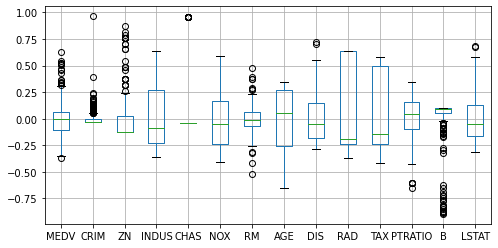

<Figure size 432x288 with 0 Axes>

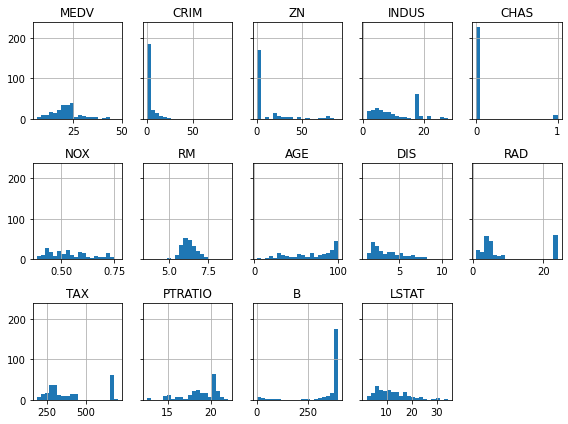

In [7]:
def preprocess_features(boston_housing_dataframe):
    '''
    Prepare features

    :param df: Raw pd.df containing Boston housing data
    :return: df_feature_train, df_feature_test, df_feature_validate, df_targets_train, df_targets_test, df_targets_validate
    '''
    feature = boston_housing_dataframe.copy()

    df_feature_train, df_feature_test, df_feature_validate = cut_data(feature,[0.5,0.25])
    
    df_feature_train = df_feature_train[df_feature_train.MEDV!=df_feature_train.MEDV.max()]
    df_feature_train = df_feature_train[df_feature_train.NOX !=df_feature_train.NOX.max() ]
    #df_feature_train['NOX'] = np.power(df_feature_train['NOX'],2) # Belsley (1980)
    #df_feature_train['RM' ] = np.power(df_feature_train['RM' ],2) # Harrison (1978)
    
    df_feature_test  = df_feature_test [df_feature_test .MEDV!=df_feature_test .MEDV.max()]
    df_feature_test  = df_feature_test [df_feature_test .NOX !=df_feature_test .NOX.max() ]
    #df_feature_test ['NOX'] = np.power(df_feature_test ['NOX'],2) # Belsley (1980)
    #df_feature_train['RM' ] = np.power(df_feature_train['RM' ],2) # Harrison (1978)

    target = 'MEDV'
    df_targets_train = pd.DataFrame(df_feature_train.pop('MEDV'))
    df_targets_test = pd.DataFrame(df_feature_test.pop('MEDV'))
    df_targets_validate = pd.DataFrame(df_feature_validate.pop('MEDV'))
    return df_feature_train, df_feature_test, df_feature_validate, df_targets_train, df_targets_test, df_targets_validate


df_feature_train, df_feature_test, df_feature_validate, df_targets_train, df_targets_test, df_targets_validate \
= preprocess_features(df_boston_housing)

df_all_train = pd.concat([df_targets_train, df_feature_train],axis=1)
pprint(((df_all_train-df_all_train.mean()) / (df_all_train.max()-df_all_train.min())).boxplot(figsize=(8,4)))
pprint(df_all_train.hist(bins=20, figsize=(8,6), layout=(3,5), sharey=True))
plt.tight_layout()
pprint(plot_corr(df_all_train, cluster=True))#.render()
pprint(plot_corr(df_all_train, cluster=True, absolute=True))#.render()

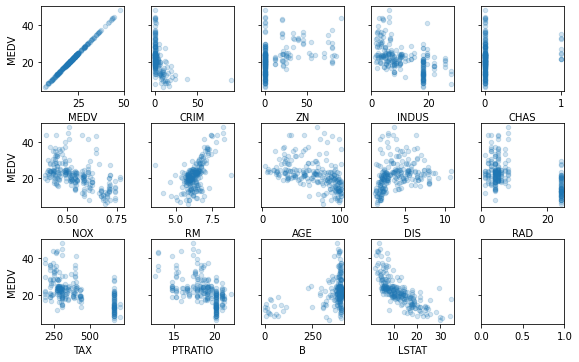

{'bucket': ['B', 'CRIM', 'ZN', 'TAX', 'RAD'],
 'numeric': ['LSTAT', 'PTRATIO', 'RM', 'MEDV', 'INDUS', 'NOX', 'AGE', 'DIS'],
 'categorical': ['CHAS']}

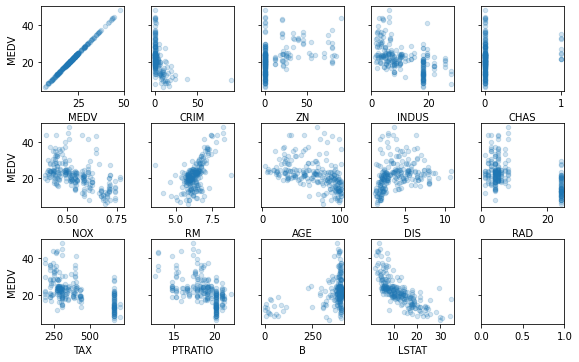

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(3, 5, figsize=(8,5), sharey=True)
fig.tight_layout()
ax_flat = ax.flatten()
for i in range(df_all_train.shape[1]):
    df_all_train.plot.scatter(df_all_train.columns[i], 'MEDV', ax=ax_flat[i], alpha=0.2)
    
pprint(fig)

data_types = {'bucket': ['B', 'CRIM', 'ZN', 'TAX', 'RAD'],
'numeric': ['LSTAT', 'PTRATIO', 'RM', 'MEDV', 'INDUS', 'NOX', 'AGE', 'DIS'],
'categorical': ['CHAS']}
pprint(data_types)

<AxesSubplot:title={'center':'Within-group correlation (selected features)'}>

<AxesSubplot:title={'center':'Between-group correlation (selected features, rejected features)'}>

 => 
selected_features: ['LSTAT', 'PTRATIO', 'B', 'RM', 'CRIM', 'ZN', 'AGE', 'TAX']
rejected_features : ['INDUS', 'CHAS', 'NOX', 'DIS', 'RAD']



<Figure size 432x288 with 0 Axes>

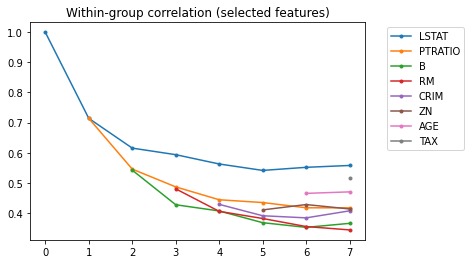

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

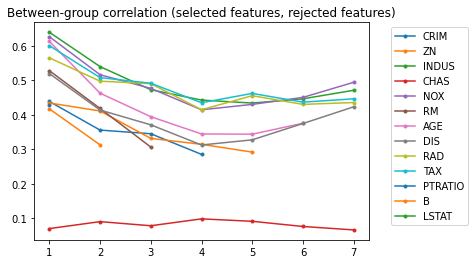

<Figure size 432x288 with 0 Axes>

In [9]:
def greedy_feature_selection(df, target_name, dummy_name):
    #corr_all = df.copy().rank().corr().abs()
    corr_all = df.copy().corr().abs()
    
    target = df[target_name]
    selected_feature = []#['NOX','RM','LSTAT']
    rejected_feature = [x for x in df.columns if x is not target_name]
    
    def thres_score(too_bad, good_enough):
        return (
            lambda x : np.interp(x, [-1000, too_bad, good_enough, 10000], [-10000,0,good_enough,1000]) if np.isfinite(x) else 0
        )   
    
    within_group_corr = []
    between_group_corr = []
    avg_target_corr = []
    while (len(rejected_feature)>0) :
        prediction_power = corr_all.loc()['MEDV'][rejected_feature].map( thres_score(0.0,0.6) )
        correlation = corr_all.loc()[rejected_feature][selected_feature]
        uniqueness = correlation.apply(lambda x : 1.0-x.mean(),axis=1).map( thres_score(1.0-0.6,1.0-0.3) )
        score = prediction_power+uniqueness
        winner = score.idxmax()
        if (winner == dummy_name) :
            break
        #print(f'Adding {winner}\tScore: {score[winner]:.2f} vs {score[dummy_name]:.2f}')
        rejected_feature.remove(winner)
        selected_feature.append(winner)
        self_correlation = corr_all.loc()[selected_feature][selected_feature].mean(axis=1)
        within_group_corr+=[self_correlation.copy()]
        between_group_corr+=[correlation.mean(axis=1).copy()]
        avg_target_corr.append(corr_all.loc()['MEDV'][selected_feature].mean())
        #stat.append(prediction_power[selected_feature].mean()*len(selected_feature))
    
    plt.figure()
    p = pd.concat(within_group_corr,axis=1).T.plot(style='.-', title='Within-group correlation (selected features)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    pprint(p)
    plt.figure()
    p = pd.concat(between_group_corr,axis=1).T.plot(style='.-', title='Between-group correlation (selected features, rejected features)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    pprint(p)
    pprint(f'\nselected_features: {selected_feature}\nrejected_features : {rejected_feature}')
    #pd.Series(avg_target_corr).plot()
    return selected_feature

selected_feature = greedy_feature_selection(df_all_train,'MEDV','CHAS')

#category data나 nonlinear한 feature를 잘 고려하기 위해서는 correlation이 아니라 좀더 복잡한 모델을 넣을 수도 있을 것이다

In [10]:
pprint('''
greedy하게 target과의 correlation이 높으면서 이미 선택된 feature와 correlation이 낮은 feature를 선택했다.
dummy가 나오는 경우를 early exit condition으로 잡았다.
위의 차트로부터 적절한 feature의 개수는 4개~7개 정도로 추측할 수 있다.

Within-group correlation : 선택한 feature set의 intrinsic dimension이 증가하고 있다. (intrinsic dimension : F Camastra 2002)
Between-group correlation : 데이터를 4개 선택하면 나머지 feature를 예측하기 시작한다.
''')

 => 
greedy하게 target과의 correlation이 높으면서 이미 선택된 feature와 correlation이 낮은 feature를 선택했다.
dummy가 나오는 경우를 early exit condition으로 잡았다.
위의 차트로부터 적절한 feature의 개수는 4개~7개 정도로 추측할 수 있다.

Within-group correlation : 선택한 feature set의 intrinsic dimension이 증가하고 있다. (intrinsic dimension : F Camastra 2002)
Between-group correlation : 데이터를 4개 선택하면 나머지 feature를 예측하기 시작한다.




In [11]:
from sklearn import linear_model
l_regression = linear_model.LinearRegression()
lasso = linear_model.Lasso()
l_ridge = linear_model.Ridge()

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge())

from sklearn.preprocessing import PolynomialFeatures


from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
#scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#scores_map['GradientBoostingRegressor'] = scores
#print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores_list=[]
scores = cross_val_score(lasso, df_feature_train[selected_feature], df_targets_train, cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())); scores_list.append(scores)
scores = cross_val_score(l_regression, df_feature_train[selected_feature], df_targets_train, cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())); scores_list.append(scores)
scores = cross_val_score(l_ridge, df_feature_train[selected_feature], df_targets_train, cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())); scores_list.append(scores)
scores = cross_val_score(model, df_feature_train[selected_feature], df_targets_train['MEDV'], cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())); scores_list.append(scores)
scores = cross_val_score(gbr, df_feature_train[selected_feature], df_targets_train['MEDV'], cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())); scores_list.append(scores)

RMSE: -4.65 (+/- 0.81)
RMSE: -4.40 (+/- 1.08)
RMSE: -4.39 (+/- 1.06)
RMSE: -3.49 (+/- 0.69)
RMSE: -3.39 (+/- 0.62)


<AxesSubplot:>

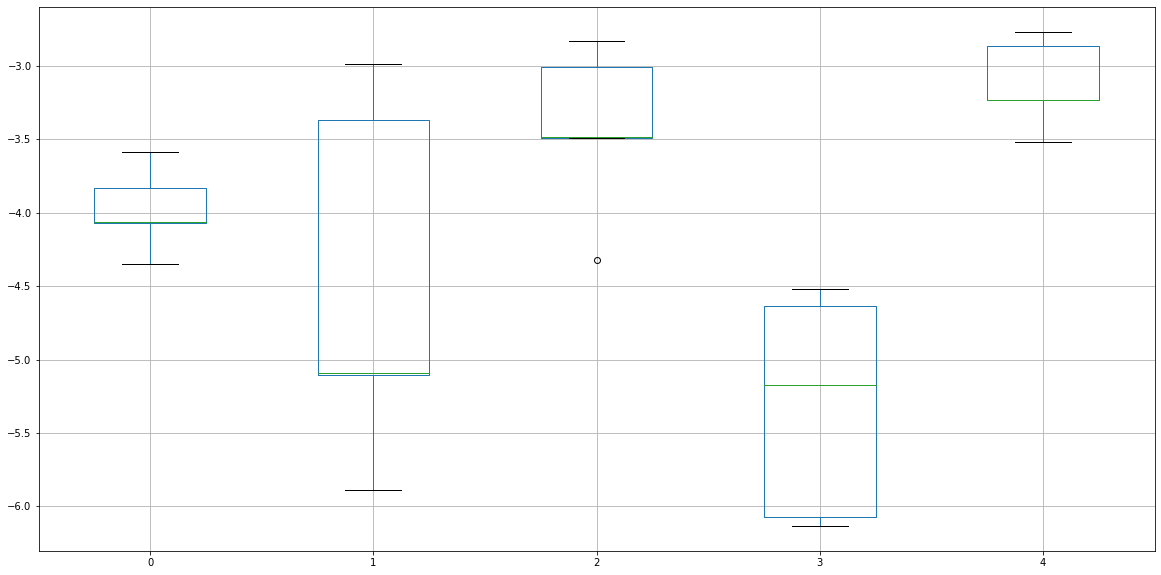

In [12]:
plt.figure(figsize=(20, 10))
scores_list = pd.DataFrame(scores_list)
scores_list.boxplot()
#sns.boxplot(data=scores_list)

In [134]:
## Reference : https://www.tensorflow.org/tutorials
## https://www.tensorflow.org/guide/keras/functional

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
tf.keras.backend.set_floatx('float32')
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# 판다스 데이터프레임으로부터 tf.data 데이터셋을 만들기 위한 함수
def df_to_dataset(df_feature, df_targets, shuffle=True, batch_size=32):
    df_feature = df_feature.copy()
    df_targets = df_targets.copy()
    #ds = tf.data.Dataset.from_tensor_slices((df_feature.to_dict(orient='list'), df_targets))
    ds = tf.data.Dataset.from_tensor_slices((dict(df_feature), df_targets))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df_feature))
    ds = ds.batch(batch_size)
    return ds

# 입력 파이프라인 만들기
batch_size = 32
max_price = 50
train_ds = df_to_dataset(df_feature_train[selected_feature],df_targets_train.MEDV/max_price, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(df_feature_test[selected_feature],df_targets_test.MEDV/max_price, shuffle=False, batch_size=batch_size)
val_ds = df_to_dataset(df_feature_validate[selected_feature],df_targets_validate.MEDV/max_price, shuffle=False, batch_size=batch_size)

scaler = preprocessing.StandardScaler()
df_feature_train_scaled = pd.DataFrame(scaler.fit_transform(df_feature_train), columns = df_feature_train.columns)
df_feature_test_scaled = pd.DataFrame(scaler.fit_transform(df_feature_test), columns = df_feature_test.columns)
df_feature_validate_scaled = pd.DataFrame(scaler.fit_transform(df_feature_validate), columns = df_feature_test.columns)

train_ds = df_to_dataset(df_feature_train_scaled[selected_feature],df_targets_train.MEDV/max_price, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(df_feature_test_scaled[selected_feature],df_targets_test.MEDV/max_price, shuffle=False, batch_size=batch_size)
val_ds = df_to_dataset(df_feature_validate_scaled[selected_feature],df_targets_validate.MEDV/max_price, shuffle=False, batch_size=batch_size)


#train_ds = df_to_dataset(df_feature_train,df_targets_train.MEDV, shuffle=False, batch_size=batch_size)
#test_ds = df_to_dataset(df_feature_test,df_targets_test.MEDV, shuffle=False, batch_size=batch_size)
#val_ds = df_to_dataset(df_feature_validate,df_targets_validate.MEDV, shuffle=False, batch_size=batch_size)

In [135]:
feature_columns = []
feature_layer_inputs = {}

# 수치형 열
for header in [x for x in selected_feature]:
    feature_columns.append(feature_column.numeric_column(header, dtype=tf.float64))
    feature_layer_inputs[header] = tf.keras.Input(shape=(1,), name=header)

raw_features_idx = {x[1].key:x[0] for x in enumerate(feature_columns)}

# 버킷형 열
# quantiles = df_feature_train.quantile(q=[0.2,0.4,0.6,0.8], interpolation='nearest')
# for header in [x for x in selected_feature if (x in data_types['bucket'])]:
#     bucktized_feature = feature_column.bucketized_column(
#         #feature_columns[raw_features_idx[header]],
#         feature_column.numeric_column(header, dtype=tf.float64),
#         boundaries = quantiles[header].unique().tolist())
#     feature_columns.append(bucktized_feature)
#     # self cross (안됨)
#     feature_layer_inputs['bucket_'+header] = tf.keras.Input(shape=(1,), name='bucket_'+header)
#     self_cross_feature = feature_column.indicator_column(feature_column.crossed_column(
#         ['bucket_'+header,header], hash_bucket_size=1000))
#     feature_columns.append(self_cross_feature)

# 범주형 (CHAS밖에 없으므로 보통은 실행되지 않음)
# for header in [x for x in selected_feature if (x in data_types['categorical'])]:
#     feature_columns.append(feature_column.categorical_column_with_identity(header))
#     feature_layer_inputs[header] = tf.keras.Input(shape=(1,), name=header)

# 교차 특성 열
def add_crossed_feature(feature_columns, headers):
    if len(headers) > 1 :
        feature_columns.append(feature_column.indicator_column(feature_column.crossed_column(
                headers, hash_bucket_size=1000)))  
# 유사한 특성별로 교차 특성 추가
#add_crossed_feature(feature_columns, [x for x in selected_feature if (x in data_category['neighborhood'])])
#add_crossed_feature(feature_columns, [x for x in selected_feature if (x in data_category['structural'])])
add_crossed_feature(feature_columns, [x for x in selected_feature if (x in data_category['accessibility']+data_category['pollution'])])

# 특성 층 만들기
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

feature_layer

In [144]:
# 모델 생성, 컴파일, 훈련

## TF 1
# model = tf.keras.Sequential([
#   feature_layer,
#   layers.Dense(128, activation='relu'),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(1, activation='sigmoid')
# ])

## TF 2
tf.random.set_seed(0)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer_outputs = feature_layer(feature_layer_inputs)
x = layers.Dense(128, activation='relu')(feature_layer_outputs)
x = layers.Dense(64, activation='relu')(x)
baggage_pred = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=[v for v in feature_layer_inputs.values()], outputs=baggage_pred)


model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)


Epoch 1/10
8/8 [==============================] - 0s 16ms/step - loss: 0.1130 - mse: 0.0234 - val_loss: 0.0913 - val_mse: 0.0213
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0610 - mse: 0.0081 - val_loss: 0.0713 - val_mse: 0.0148
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0567 - mse: 0.0062 - val_loss: 0.0635 - val_mse: 0.0115
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0491 - mse: 0.0046 - val_loss: 0.0626 - val_mse: 0.0109
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0457 - mse: 0.0040 - val_loss: 0.0586 - val_mse: 0.0103
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0437 - mse: 0.0037 - val_loss: 0.0581 - val_mse: 0.0104
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.0409 - mse: 0.0034 - val_loss: 0.0585 - val_mse: 0.0104
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0032 - val_loss: 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


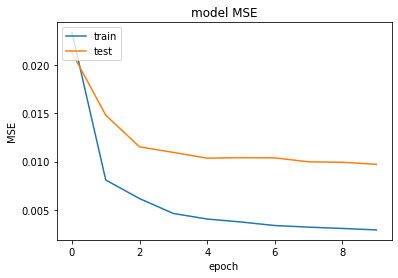

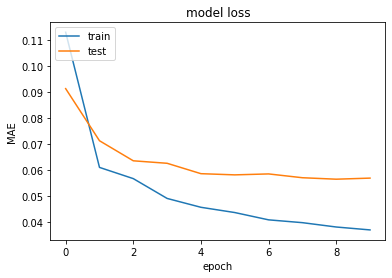

In [150]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

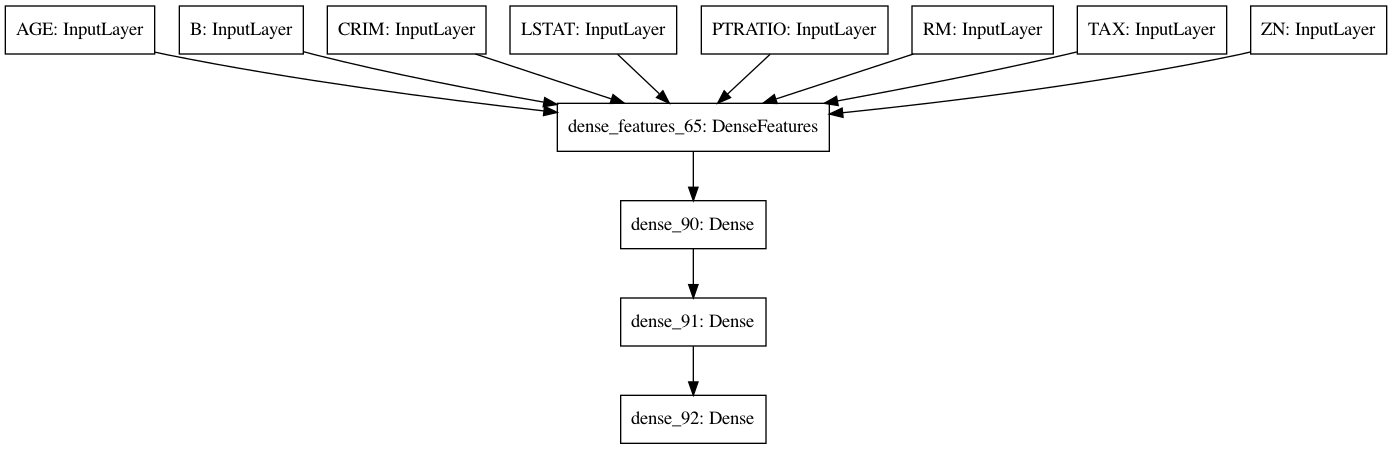

In [143]:
#tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
tf.keras.utils.plot_model(model, show_shapes=False)

<AxesSubplot:xlabel='0', ylabel='1'>

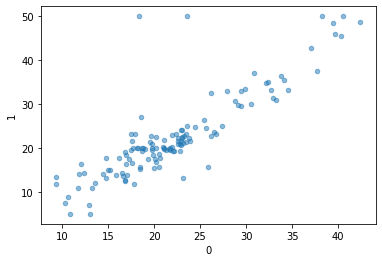

In [70]:
pd.concat([
    pd.Series((model.predict(val_ds).T*max_price).flatten()),
    pd.Series(df_targets_validate.values.T.flatten())
],axis=1).plot.scatter(0,1, alpha=0.5)


In [ ]:
PDFkit, Jinja2
#https://towardsdatascience.com/creating-pdf-reports-with-python-pdfkit-and-jinja2-templates-64a89158fa2d